#cluster means grouping..when centroid is similar..stored in cluster..


In [59]:
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'sepal width and length')

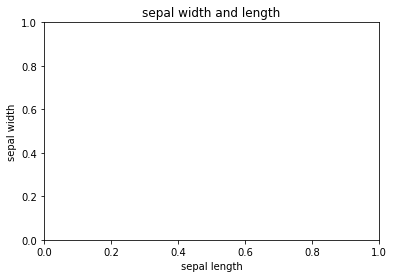

In [67]:
iris=datasets.load_iris()
X=iris.data[:,:2]
Y=iris.target
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.title("sepal width and length")

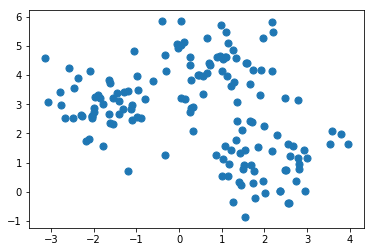

In [68]:
x,y=make_blobs(n_samples=150,centers=3,cluster_std=0.80,random_state=0)
plt.scatter(x[:,0],x[:,1],s=50)

In [69]:
from sklearn.cluster import KMeans

In [70]:
km=KMeans(n_clusters=3)
km.fit(x)
pred=km.predict(x)
print(pred)


[0 1 1 1 0 1 1 0 2 1 0 0 2 1 1 2 2 0 2 0 1 0 1 1 2 0 0 1 2 0 2 2 2 2 1 0 0
 0 1 1 2 2 1 0 0 0 2 0 2 1 0 1 1 0 0 2 1 0 2 1 2 1 2 2 1 1 1 0 1 1 1 0 0 1
 0 1 1 2 2 1 0 0 1 1 0 0 0 2 2 0 0 1 0 1 0 1 2 2 0 0 0 0 2 0 0 1 2 1 1 1 2
 1 0 2 1 2 1 1 2 2 1 0 1 1 0 0 2 0 2 2 2 2 0 2 2 2 1 2 0 2 1 1 0 0 2 2 2 2
 0 0]


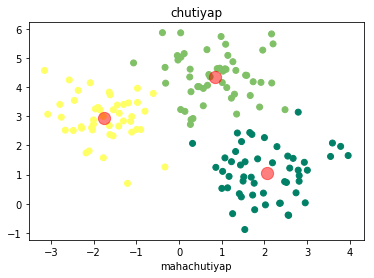

In [73]:
plt.scatter(x[:,0],x[:,1],c=pred,cmap="summer")
plt.title("chutiyap")
plt.xlabel("mahachutiyap")
centers=km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c="red",s=150,alpha=0.5)

how km algo works???????
step 1:chhose the number of k clusters
step 2:select at random kpoints,the centriods
step3:assign each data points to closest centriod
step 4:compute and place the new centroid of each cluster
step 5:reassign each data point to the new closest centroid
if any reassignment take place ,go to step 4.

In [6]:
from sklearn.cluster import KMeans
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [38]:
img=Image.open("me.jpg")
img_np=np.asarray(img)
img_np.shape

(413, 359, 3)

In [39]:
pixels=img_np.reshape(img_np.shape[0]*img_np.shape[1],img_np.shape[2])
pixels.shape

(148267, 3)

In [40]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=16)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
pixels_centroids=model.labels_
cluster_centres=model.cluster_centers_
pixels_centroids

array([12, 12, 12, ...,  2,  2,  2])

In [32]:
cluster_centres

array([[ 1.86801685e-11, -4.05755429e-11,  2.28119745e-11],
       [ 1.85000000e+02,  1.22000000e+02,  8.70000000e+01],
       [ 6.30000000e+01,  7.20000000e+01,  2.04000000e+02],
       [ 3.40000000e+01,  1.77000000e+02,  7.60000000e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.55000000e+02,  2.42000000e+02,  9.23705556e-14],
       [ 2.55000000e+02,  1.74000000e+02,  2.01000000e+02],
       [ 1.36000000e+02, -1.29674049e-12,  2.10000000e+01],
       [ 1.53000000e+02,  2.17000000e+02,  2.34000000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01],
       [ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01],
       [ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01],
       [ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01],
       [ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01],
       [ 2.37000000e+02,  2.80000000e+01,  3.60000000e+01]])

In [42]:
final=np.zeros((pixels_centroids.shape[0],3))
final.shape

(148267, 3)

In [43]:
for cluster_no in range(16):
    final[pixels_centroids == cluster_no] = cluster_centres[cluster_no]
final[0:5]

array([[177.82602848, 174.76115506, 185.49572785],
       [177.82602848, 174.76115506, 185.49572785],
       [177.82602848, 174.76115506, 185.49572785],
       [177.82602848, 174.76115506, 185.49572785],
       [177.82602848, 174.76115506, 185.49572785]])

In [26]:
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(413, 359, 3)

In [51]:
comp_image=Image.fromarray(np.uint8(comp_image))
comp_image.save("‪imagee.jpg")


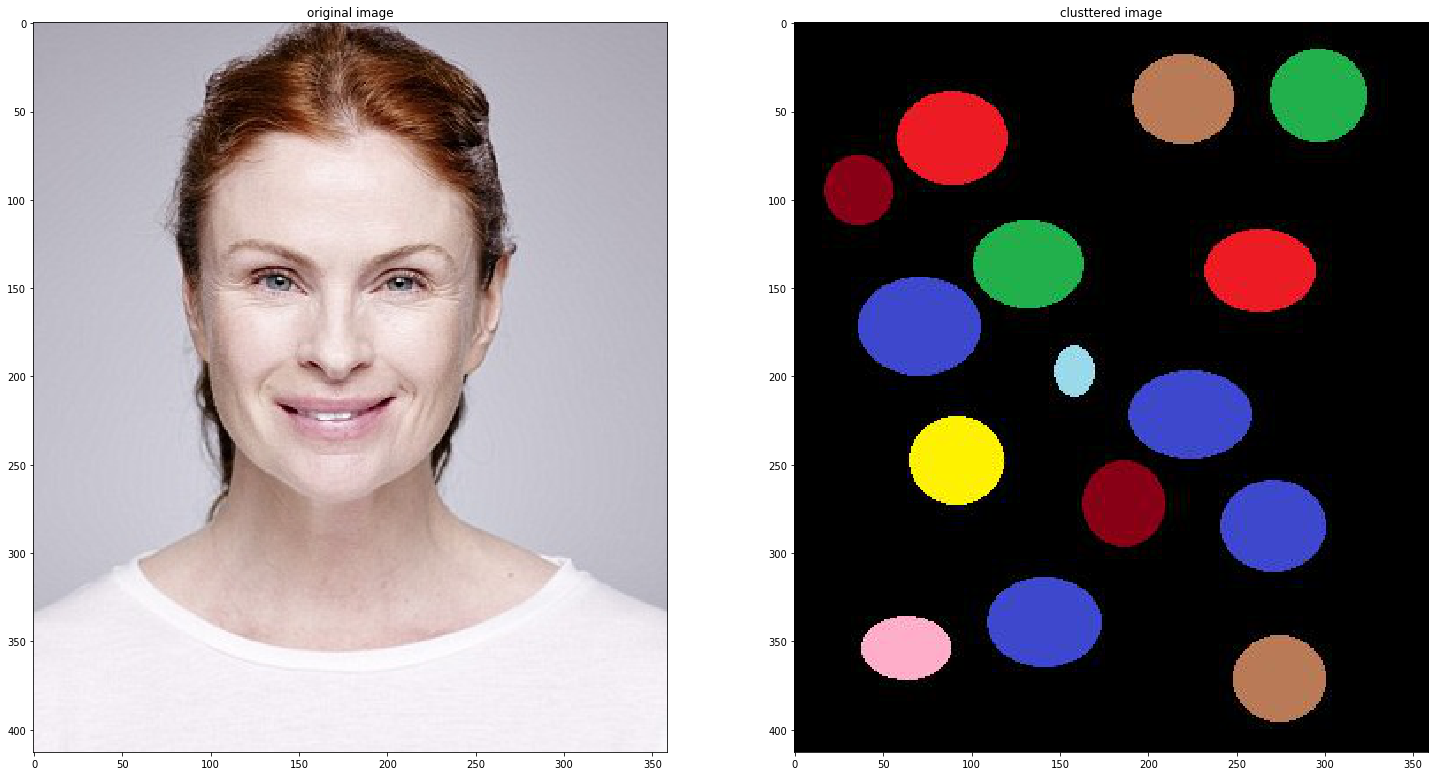

In [52]:
fname="me.jpg"
fname1="‪imagee.jpg"
img1=mpimg.imread(fname,0)
img2=mpimg.imread(fname1,0)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,25))
ax1.imshow(img1)
ax1.set_title("original image")
ax2.imshow(img2)
ax2.set_title('clusttered image')
plt.show()
